In [1]:
# !pip install PyQt5

In [64]:
from copy import deepcopy
import sys
import shapely
from shapely.plotting import plot_polygon
from shapely import Point
from shapely import box
import matplotlib.pyplot as plt
from matplotlib import animation 

from PyQt5.QtWidgets import *
from tkinter import *

In [3]:
################Module For Functional Programing#########################
from functools import reduce; from itertools import chain
from itertools import groupby; import operator
from copy import deepcopy
curry = lambda f: lambda a,*args: f(a, *args) if (len(args)) else lambda *args: f(a, *args)

filter, map, reduce = curry(filter), curry(map), curry(reduce)

go = lambda *args: reduce(lambda a,f: f(a), args) ## 함수도 축약 가능 ##

def dictUpdate(dic1,dic2):
    dic1.update(dic2)
    return dic1
    
def dictsMerge(dics):
    res = reduce(dictUpdate, dics)
    return res
    
def dictDeleteKeys(dic, keys):
    for k in keys:
        del dic[k]
    return dic

def flat(a):
    if isinstance(a, list):
        for i in a: 
            yield from flat(i)
    else: yield a

def grpBy(iter, key):
    f,keys,grps = key,[],[]
    sorted_ = sorted(iter, key=f)
    for key, grp_data in groupby(sorted_,key=f):
        keys.append(key); grps.append(list(grp_data))
    return grps,keys
#########################################################################

In [80]:
def show_polygons(datas):
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    ax = fig.add_subplot()
    list(map(lambda x: plot_polygon(x, ax=ax, add_points=False), datas))
    ax.axes.set_aspect(aspect=1)
    
def show_GridPoints(points, mode="2d"):
    xs = [point.x for point in points]
    ys = [point.y for point in points]
    zs = [point.z for point in points]
    
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    
    if mode == "2d":
        ax = fig.add_subplot()
        ax.axes.set_aspect(aspect=1)
        ax.scatter(xs,ys)
    elif mode == "3d":
        ax = fig.add_subplot(projection="3d")
        ax.axes.set_aspect(aspect="auto")
        ax.scatter(xs,ys,zs)

In [81]:
# inputSpan = [
#     [6,7,7,8],
#     7,
#     6,
# ]

def input_FrameDim():
    def clear(event, entElem, defaultStr): # clear 함수 정의 시 입력 변수로 event 넣어 줌
        if entElem.get() == defaultStr:
            entElem.delete(0,len(entElem.get())) # entElem의 내용 전부 지우기
            
    def make_labelEntry_set(label, entElem, defaultStr):
        label.pack()
        entElem.insert(0,defaultStr)
        entElem.bind("<Button-1>", lambda x: clear(x, entElem, defaultStr)) # Button-1(마우스 좌클릭) 이벤트 발생 시 clear 함수 실행
        entElem.pack()
    
    win = Tk()
    win.geometry("500x200")
    win.title("input_FrameDim")
    
    label1 = Label(win, text='층정보 입력 : \n(단일 숫자 입력시 층 개수 || 콤마구분 입력시 각 층 높이 - ex> 4,5,5)')
    storiesInput = Entry(win)
    make_labelEntry_set(label1, storiesInput, "4 or 5,6")
    
    label2 = Label(win, text='층높이 입력 : (층정보 입력에서 콤마 구분시 누락 가능)')
    storyHeightInput = Entry(win)
    make_labelEntry_set(label2, storyHeightInput, "6")
    
    btn = Button(win)
    btn.config(text = "입력")
    res = []
    def pushData():
        StoriesInput = storiesInput.get()
        # print(a)
        res.append(StoriesInput)
        win.destroy()
    btn.config(command = pushData)
    btn.pack()
    
    win.mainloop() # 창 실행
    StoriesInput, StoryHeightInput, Bays_X, Bays_Y = res
    # if isinstance(StoriesInput,list):
    #     stories = list(map(int, StoriesInput.split(",")))
    # else:
    #     stories = [int(StoryHeightInput)] * int(StoriesInput)
    
    # if isinstance(Bays_X,list):
    #     bayX = list(map(int, Bays_X.split(",")))
    # else:
    #     bayX = 0
    # return stories, Bays_X, Bays_Y
    return res
    
input_FrameDim()

ValueError: not enough values to unpack (expected 4, got 0)

In [82]:
# win = Tk()
# win.geometry("500x200")
# win.title("input_FrameDim")
# # win.option_add("*Font","궁서 25")
# ent = Entry(win) # 입력창 생성
# ent.pack() # 입력창 배치
# win.mainloop() # 창 실행

In [83]:
def create_inputSpanInfo(inputSpan):
    xSpans, ySpans, stories  = inputSpan
    return {"xSpans": xSpans, "ySpans": ySpans, "stories": stories}

In [84]:
# sttPt = [0,0,0]

def findAllGridPts(spanInfo, sttPt=[0,0,0]):
    xSpans = spanInfo["xSpans"]
    ySpans = spanInfo["ySpans"]
    stories = spanInfo["stories"]
    # 첫줄 만들기
    firstRowPts = [sttPt]
    newPt = deepcopy(sttPt)
    for x in xSpans:
        newPt[0] = newPt[0] + x
        firstRowPts.append(deepcopy(newPt))
    # 그 다음 줄 들 만들기
    firstFl = [firstRowPts]
    nextRowPts = deepcopy(firstRowPts)
    for y in ySpans:
        for pt in nextRowPts:
            pt[1] = pt[1] + y
        firstFl.append(deepcopy(nextRowPts))
    
    allFls = [firstFl]
    nextFl = deepcopy(firstFl)
    for z in stories:
        for row in nextFl:
            for pt in row:
                pass
                pt[2] = pt[2] + z
        allFls.append(deepcopy(nextFl))
    
    return allFls

In [94]:
def createPoints(allGridPts):
    res = []
    for fl in allGridPts:
        newFl = []
        for row in fl:
            newRow = []
            for pt in row:
                newRow.append(Point(*pt))
            newFl.append(newRow)
        res.append(newFl)
    return res

def createPoints_noLev(allGridPts):
    res = []
    for fl in allGridPts:
        # newRow = []
        for row in fl:
            for pt in row:
                res.append(Point(*pt))
        # res.append(newRow)
    return res

def createMultiPoints(allGridPts):
    lst = []
    for row in allGridPts:
        # res.append(shapely.MultiPoint(row))
        # newRow = []
        for pt in row:
            lst.append(Point(*pt))
    res = shapely.MultiPoint(lst)
    return res

# def createLines(allPts):
    
#     for row in allPts:
#         newRow = []
#         for p

In [95]:
inputSpan = [
    [6,7,7,8], # xSpans
    [7,6], # ySpans
    [5,4]  # stories
    ]

In [96]:
spanInfo = create_inputSpanInfo(inputSpan)
spanInfo

{'xSpans': [6, 7, 7, 8], 'ySpans': [7, 6], 'stories': [5, 4]}

In [97]:
allGridPts = findAllGridPts(spanInfo)#, sttPt=[10,5,0])
allGridPts

[[[[0, 0, 0], [6, 0, 0], [13, 0, 0], [20, 0, 0], [28, 0, 0]],
  [[0, 7, 0], [6, 7, 0], [13, 7, 0], [20, 7, 0], [28, 7, 0]],
  [[0, 13, 0], [6, 13, 0], [13, 13, 0], [20, 13, 0], [28, 13, 0]]],
 [[[0, 0, 5], [6, 0, 5], [13, 0, 5], [20, 0, 5], [28, 0, 5]],
  [[0, 7, 5], [6, 7, 5], [13, 7, 5], [20, 7, 5], [28, 7, 5]],
  [[0, 13, 5], [6, 13, 5], [13, 13, 5], [20, 13, 5], [28, 13, 5]]],
 [[[0, 0, 9], [6, 0, 9], [13, 0, 9], [20, 0, 9], [28, 0, 9]],
  [[0, 7, 9], [6, 7, 9], [13, 7, 9], [20, 7, 9], [28, 7, 9]],
  [[0, 13, 9], [6, 13, 9], [13, 13, 9], [20, 13, 9], [28, 13, 9]]]]

In [163]:
allPtsGrps = createPoints(allGridPts)
def createAllCols(allPtsGrps):
    flattenPts = list(chain(*chain(*allPtsGrps)))    
    res = go(
            grpBy(flattenPts, key=lambda x:(x.x,x.y))[0],
            map(lambda x: shapely.LineString(x)),
            map(lambda x: x.buffer(0.1)),
            list,
            
    )
    # bayFrameSet = list(map(lambda x: x[0], allPtsGrps))
            

    return res
    

allCols = createAllCols(allPtsGrps)
allCols


[<POLYGON ((0.1 0, 0.1 -0.01, 0.098 -0.02, 0.096 -0.029, 0.092 -0.038, 0.088 ...>,
 <POLYGON ((0.1 7, 0.1 6.99, 0.098 6.98, 0.096 6.971, 0.092 6.962, 0.088 6.95...>,
 <POLYGON ((0.1 13, 0.1 12.99, 0.098 12.98, 0.096 12.971, 0.092 12.962, 0.088...>,
 <POLYGON ((6.1 0, 6.1 -0.01, 6.098 -0.02, 6.096 -0.029, 6.092 -0.038, 6.088 ...>,
 <POLYGON ((6.1 7, 6.1 6.99, 6.098 6.98, 6.096 6.971, 6.092 6.962, 6.088 6.95...>,
 <POLYGON ((6.1 13, 6.1 12.99, 6.098 12.98, 6.096 12.971, 6.092 12.962, 6.088...>,
 <POLYGON ((13.1 0, 13.1 -0.01, 13.098 -0.02, 13.096 -0.029, 13.092 -0.038, 1...>,
 <POLYGON ((13.1 7, 13.1 6.99, 13.098 6.98, 13.096 6.971, 13.092 6.962, 13.08...>,
 <POLYGON ((13.1 13, 13.1 12.99, 13.098 12.98, 13.096 12.971, 13.092 12.962, ...>,
 <POLYGON ((20.1 0, 20.1 -0.01, 20.098 -0.02, 20.096 -0.029, 20.092 -0.038, 2...>,
 <POLYGON ((20.1 7, 20.1 6.99, 20.098 6.98, 20.096 6.971, 20.092 6.962, 20.08...>,
 <POLYGON ((20.1 13, 20.1 12.99, 20.098 12.98, 20.096 12.971, 20.092 12.962, ...>,
 <PO

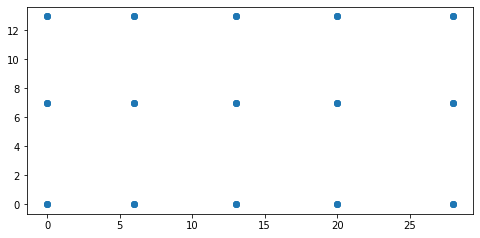

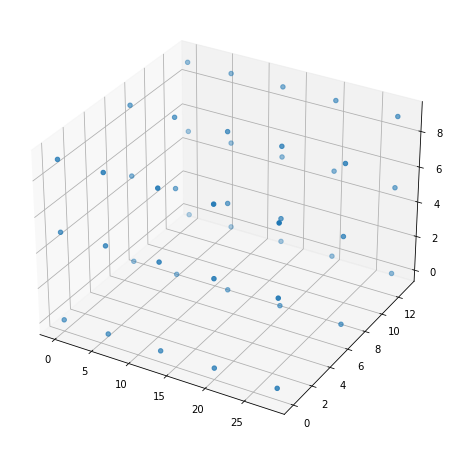

In [164]:
allPts = createPoints_noLev(allGridPts)
allPts
show_GridPoints(allPts)
show_GridPoints(allPts, mode="3d")

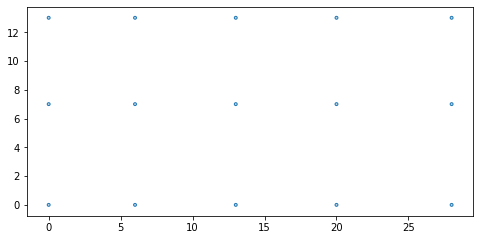

In [167]:
# aa = list(map(lambda x: shapely.LineString(x),allPts))
# aa = shapely.LineString(allPts)
show_polygons(allCols)

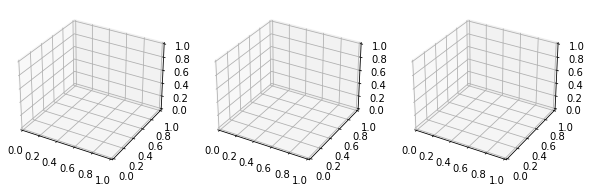

In [63]:
fig = plt.figure(figsize=(10, 3))
ax0 = fig.add_subplot(131, projection="3d")
ax1 = fig.add_subplot(132, projection="3d")
ax2 = fig.add_subplot(133, projection="3d")